In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [372]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [373]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323571 entries, 0 to 1323570
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1323571 non-null  int64  
 1   kWh       1323571 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 20.2 MB


In [374]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1323566    0.18
1323567    0.18
1323568    0.18
1323569    0.18
1323570    0.18
Name: kWh, Length: 1323571, dtype: float64

In [375]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1323566    0.18
1323567    0.18
1323568    0.18
1323569    0.18
1323570    0.18
Name: kWh, Length: 1323571, dtype: float64

In [376]:
l=len(conso_data)-1
l

1323570

In [377]:
conso_data['sec']=conso_data['Interval']/1000


In [378]:
conso_data['Wh']=3600000/conso_data['Interval']


In [379]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [380]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323571 entries, 0 to 1323570
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1323571 non-null  int64  
 1   kWh        1323571 non-null  float64
 2   sec        1323571 non-null  float64
 3   Wh         1323571 non-null  float64
 4   cumul(ms)  1323571 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 50.5 MB


In [381]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1323566,20209,0.18,20.209,178.138453,31190722372
1323567,20330,0.18,20.330,177.078210,31190742702
1323568,19672,0.18,19.672,183.001220,31190762374
1323569,19961,0.18,19.961,180.351686,31190782335
1323570,20248,0.18,20.248,177.795338,31190802583


In [382]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

31190802583000

In [383]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 13, 15, 697127)

In [384]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [385]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [386]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [387]:
conso_data['dates']

0         2023-08-21 19:13:37.631127
1         2023-08-21 19:13:59.489127
2         2023-08-21 19:14:21.490127
3         2023-08-21 19:14:43.418127
4         2023-08-21 19:15:05.309127
                     ...            
1323566   2024-08-16 19:18:38.069127
1323567   2024-08-16 19:18:58.399127
1323568   2024-08-16 19:19:18.071127
1323569   2024-08-16 19:19:38.032127
1323570   2024-08-16 19:19:58.280127
Name: dates, Length: 1323571, dtype: datetime64[ns]

In [388]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:13:37.631127,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:13:59.489127,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:14:21.490127,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:14:43.418127,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:15:05.309127,21/08/23
...,...,...,...,...,...,...,...
1323566,20209,0.18,20.209,178.138453,31190722372,2024-08-16 19:18:38.069127,16/08/24
1323567,20330,0.18,20.330,177.078210,31190742702,2024-08-16 19:18:58.399127,16/08/24
1323568,19672,0.18,19.672,183.001220,31190762374,2024-08-16 19:19:18.071127,16/08/24
1323569,19961,0.18,19.961,180.351686,31190782335,2024-08-16 19:19:38.032127,16/08/24


In [389]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, date, month, year


('16/08/24', 16, 8, 2024)

In [390]:
here = now.strftime('%H:%M:%S')
here

'19:20:29'

In [391]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [392]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3244 entries, 1320327 to 1323570
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3244 non-null   int64         
 1   kWh        3244 non-null   float64       
 2   sec        3244 non-null   float64       
 3   Wh         3244 non-null   float64       
 4   cumul(ms)  3244 non-null   int64         
 5   dates      3244 non-null   datetime64[ns]
 6   days       3244 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 202.8+ KB


In [393]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [394]:
data = list(df_grp['kWh'])
print(data)


[0.82, 3.699, 4.23, 3.675, 4.189, 4.603, 3.529, 3.416, 3.514, 3.69, 3.756, 3.811, 4.249, 3.793, 3.484, 3.636, 3.319, 3.383, 4.278, 4.009, 4.044, 3.93, 3.447, 4.445, 3.754, 3.76, 4.332, 4.702, 3.818, 3.224, 3.179, 3.99, 3.682, 3.157, 3.802, 4.129, 3.766, 3.578, 4.771, 4.195, 4.54, 3.774, 3.41, 4.304, 3.879, 3.858, 3.441, 4.08, 3.656, 3.399, 4.135, 3.385, 3.885, 3.834, 3.637, 3.76, 4.245, 3.3, 3.874, 2.986, 2.055, 2.041, 2.448, 4.089, 3.72, 4.331, 3.611, 3.927, 3.742, 3.904, 4.003, 4.105, 3.654, 3.156, 3.804, 3.509, 3.626, 3.709, 3.684, 3.241, 3.882, 3.231, 3.795, 3.612, 4.078, 3.564, 3.386, 3.817, 4.065, 4.328, 4.136, 3.998, 4.235, 3.742, 3.929, 3.861, 3.914, 3.738, 4.049, 4.346, 3.885, 3.506, 3.682, 3.668, 3.348, 3.847, 3.999, 4.101, 3.476, 4.175, 3.604, 4.064, 4.543, 3.68, 3.434, 3.58, 4.155, 3.701, 4.087, 3.981, 3.745, 3.591, 5.126, 3.702, 3.766, 4.287, 4.107, 4.7, 4.406, 3.993, 3.769, 4.359, 4.686, 4.194, 4.792, 4.316, 3.73, 4.172, 3.701, 3.651, 3.532, 3.936, 3.68, 3.785, 3.58, 3.48

In [395]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [396]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [397]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [398]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.306038
dtype: float64

In [399]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.656273
dtype: float64

In [400]:
last=df_grp.iloc[-1]['kWh']
last

3.244

In [401]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3244 entries, 1320327 to 1323570
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3244 non-null   int64         
 1   kWh        3244 non-null   float64       
 2   sec        3244 non-null   float64       
 3   Wh         3244 non-null   float64       
 4   cumul(ms)  3244 non-null   int64         
 5   dates      3244 non-null   datetime64[ns]
 6   days       3244 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 202.8+ KB


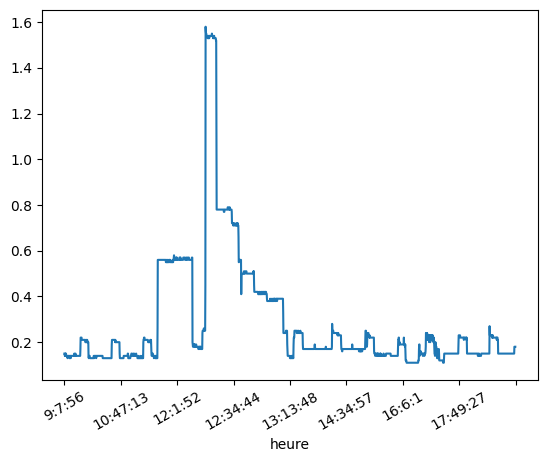

In [402]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);

In [403]:
conso_day['heure']


1320327      0:0:21
1320328      0:0:50
1320329      0:1:20
1320330      0:1:50
1320331      0:2:21
             ...   
1323566    19:18:38
1323567    19:18:58
1323568    19:19:18
1323569    19:19:38
1323570    19:19:58
Name: heure, Length: 3244, dtype: object

In [404]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:21',
              days   kWh
  heure                 
  0:0:21  16/08/24  0.12),
 ('0:0:50',
              days   kWh
  heure                 
  0:0:50  16/08/24  0.12),
 ('0:1:20',
              days   kWh
  heure                 
  0:1:20  16/08/24  0.12),
 ('0:1:50',
              days   kWh
  heure                 
  0:1:50  16/08/24  0.12),
 ('0:2:21',
              days   kWh
  heure                 
  0:2:21  16/08/24  0.12),
 ('0:2:51',
              days   kWh
  heure                 
  0:2:51  16/08/24  0.12),
 ('0:3:22',
              days   kWh
  heure                 
  0:3:22  16/08/24  0.12),
 ('0:3:52',
              days   kWh
  heure                 
  0:3:52  16/08/24  0.12),
 ('0:4:23',
              days   kWh
  heure                 
  0:4:23  16/08/24  0.12),
 ('0:4:53',
              days   kWh
  heure                 
  0:4:53  16/08/24  0.12),
 ('0:5:24',
              days   kWh
  heure                 
  0:5:24  16/08/24  0.12),
 ('0:5:54',
         

In [405]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:21',
  heure
  0:0:21    0.12
  Name: kWh, dtype: float64),
 ('0:0:50',
  heure
  0:0:50    0.12
  Name: kWh, dtype: float64),
 ('0:1:20',
  heure
  0:1:20    0.12
  Name: kWh, dtype: float64),
 ('0:1:50',
  heure
  0:1:50    0.12
  Name: kWh, dtype: float64),
 ('0:2:21',
  heure
  0:2:21    0.12
  Name: kWh, dtype: float64),
 ('0:2:51',
  heure
  0:2:51    0.12
  Name: kWh, dtype: float64),
 ('0:3:22',
  heure
  0:3:22    0.12
  Name: kWh, dtype: float64),
 ('0:3:52',
  heure
  0:3:52    0.12
  Name: kWh, dtype: float64),
 ('0:4:23',
  heure
  0:4:23    0.12
  Name: kWh, dtype: float64),
 ('0:4:53',
  heure
  0:4:53    0.12
  Name: kWh, dtype: float64),
 ('0:5:24',
  heure
  0:5:24    0.12
  Name: kWh, dtype: float64),
 ('0:5:54',
  heure
  0:5:54    0.12
  Name: kWh, dtype: float64),
 ('0:6:25',
  heure
  0:6:25    0.12
  Name: kWh, dtype: float64),
 ('0:6:54',
  heure
  0:6:54    0.12
  Name: kWh, dtype: float64),
 ('0:7:24',
  heure
  0:7:24    0.12
  Name: kWh, dtype: float

In [406]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:21,30911,0.12,30.911,116.463395,31121225919,2024-08-16 00:00:21.616127,16/08/24
0:0:50,29218,0.12,29.218,123.211719,31121255137,2024-08-16 00:00:50.834127,16/08/24
0:1:20,29234,0.12,29.234,123.144284,31121284371,2024-08-16 00:01:20.068127,16/08/24
0:1:50,30619,0.12,30.619,117.574055,31121314990,2024-08-16 00:01:50.687127,16/08/24
0:2:21,30451,0.12,30.451,118.222718,31121345441,2024-08-16 00:02:21.138127,16/08/24
...,...,...,...,...,...,...,...
19:18:38,20209,0.18,20.209,178.138453,31190722372,2024-08-16 19:18:38.069127,16/08/24
19:18:58,20330,0.18,20.330,177.078210,31190742702,2024-08-16 19:18:58.399127,16/08/24
19:19:18,19672,0.18,19.672,183.001220,31190762374,2024-08-16 19:19:18.071127,16/08/24


In [407]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [408]:
df.iloc[0].dates

Timestamp('2024-08-16 00:00:21.616127')

In [409]:
df.dates.dt.time

heure
0:0:21      00:00:21.616127
0:0:50      00:00:50.834127
0:1:20      00:01:20.068127
0:1:50      00:01:50.687127
0:2:21      00:02:21.138127
                 ...       
19:18:38    19:18:38.069127
19:18:58    19:18:58.399127
19:19:18    19:19:18.071127
19:19:38    19:19:38.032127
19:19:58    19:19:58.280127
Name: dates, Length: 3244, dtype: object

In [410]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [411]:
tranches = len(df)//1000
tranches+1

4

In [412]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-08-16 00:00:21.616127	2024-08-16 07:48:58.382127	7h 48m 36s 	1000
2024-08-16 07:48:58.382127	2024-08-16 12:35:10.107127	4h 46m 11s 	2000
2024-08-16 12:35:10.107127	2024-08-16 17:50:46.501127	5h 15m 36s 	3000
2024-08-16 17:50:46.501127	2024-08-16 19:19:58.280127	1h 29m 11s 	244


In [413]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('19:20:29', 3.244, 3244)

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3244 entries, 0:0:21 to 19:19:58
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3244 non-null   int64         
 1   kWh        3244 non-null   float64       
 2   sec        3244 non-null   float64       
 3   Wh         3244 non-null   float64       
 4   cumul(ms)  3244 non-null   int64         
 5   dates      3244 non-null   datetime64[ns]
 6   days       3244 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 331.8+ KB


In [415]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [416]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362 entries, 21/08/23 to 16/08/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     362 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


In [417]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [418]:
df_grp.tail(7)

,kWh
days,
10/08/24,4.042
11/08/24,3.700
12/08/24,4.370
13/08/24,4.362
14/08/24,3.592
15/08/24,4.014
16/08/24,3.244


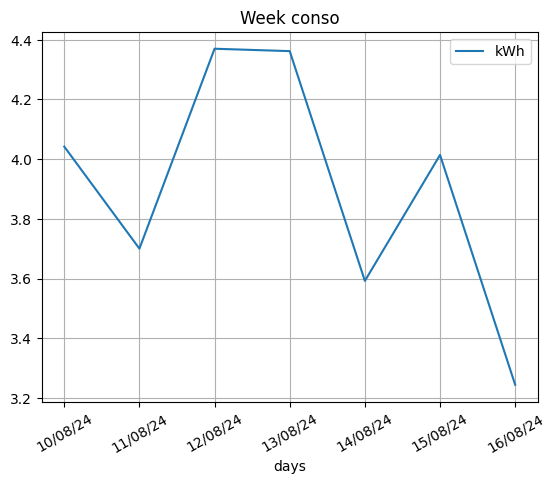

In [419]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')
plt.xticks(rotation=30);

In [420]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [421]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


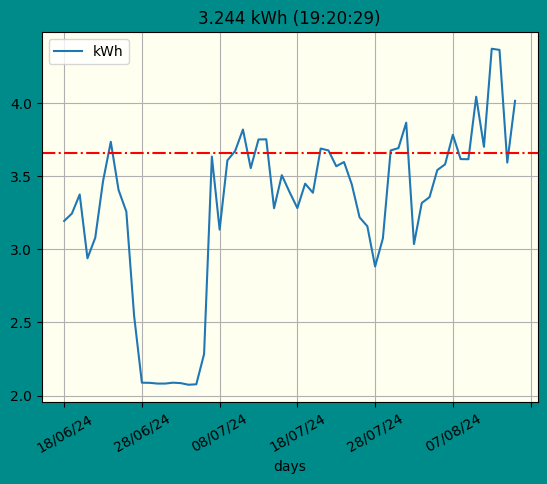

In [422]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [423]:
df_grp.mean()

kWh    3.656273
dtype: float64

In [424]:
#df_grp.head()
df_grp.tail(14)

,kWh
days,
03/08/24,3.316
04/08/24,3.356
05/08/24,3.541
06/08/24,3.580
07/08/24,3.782
08/08/24,3.616
09/08/24,3.615
10/08/24,4.042
11/08/24,3.700


In [425]:
df_grp

,kWh
days,
21/08/23,0.820
22/08/23,3.699
23/08/23,4.230
24/08/23,3.675
25/08/23,4.189
...,...
12/08/24,4.370
13/08/24,4.362
14/08/24,3.592


In [426]:
df_grp.tail(100).mean()

kWh    3.38716
dtype: float64

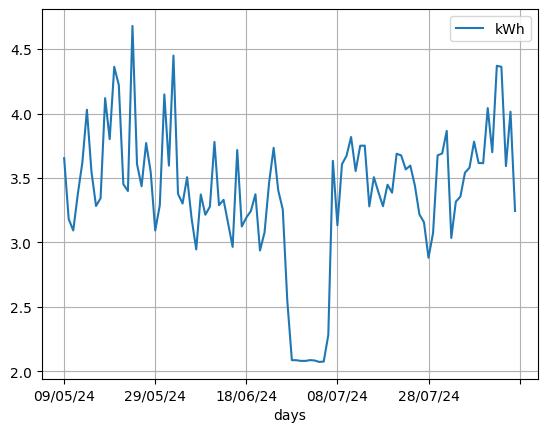

In [427]:
df_grp.tail(100).plot()
plt.grid()

In [428]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.000000
mean,3.565233
std,0.346579
min,2.882000
25%,3.363500
50%,3.586000
75%,3.690250
max,4.370000


In [429]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

12/08/24 4.37
28/07/24 2.882


In [430]:
day

'16/08/24'

In [431]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1320327,30911,0.12,30.911,116.463395,31121225919,2024-08-16 00:00:21.616127,16/08/24,0:0:21
1320328,29218,0.12,29.218,123.211719,31121255137,2024-08-16 00:00:50.834127,16/08/24,0:0:50
1320329,29234,0.12,29.234,123.144284,31121284371,2024-08-16 00:01:20.068127,16/08/24,0:1:20
1320330,30619,0.12,30.619,117.574055,31121314990,2024-08-16 00:01:50.687127,16/08/24,0:1:50
1320331,30451,0.12,30.451,118.222718,31121345441,2024-08-16 00:02:21.138127,16/08/24,0:2:21
...,...,...,...,...,...,...,...,...
1323566,20209,0.18,20.209,178.138453,31190722372,2024-08-16 19:18:38.069127,16/08/24,19:18:38
1323567,20330,0.18,20.330,177.078210,31190742702,2024-08-16 19:18:58.399127,16/08/24,19:18:58
1323568,19672,0.18,19.672,183.001220,31190762374,2024-08-16 19:19:18.071127,16/08/24,19:19:18
1323569,19961,0.18,19.961,180.351686,31190782335,2024-08-16 19:19:38.032127,16/08/24,19:19:38


In [432]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3244 entries, 1320327 to 1323570
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3244 non-null   int64         
 1   kWh        3244 non-null   float64       
 2   sec        3244 non-null   float64       
 3   Wh         3244 non-null   float64       
 4   cumul(ms)  3244 non-null   int64         
 5   dates      3244 non-null   datetime64[ns]
 6   days       3244 non-null   object        
 7   heure      3244 non-null   object        
 8   hours      3244 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 253.4+ KB


In [433]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1320327    00  0.12
  1320328    00  0.12
  1320329    00  0.12
  1320330    00  0.12
  1320331    00  0.12
  ...       ...   ...
  1320449    00  0.11
  1320450    00  0.11
  1320451    00  0.11
  1320452    00  0.11
  1320453    00  0.11
  
  [127 rows x 2 columns]),
 ('01',
          hours   kWh
  1320454    01  0.11
  1320455    01  0.11
  1320456    01  0.12
  1320457    01  0.12
  1320458    01  0.11
  ...       ...   ...
  1320575    01  0.11
  1320576    01  0.11
  1320577    01  0.11
  1320578    01  0.11
  1320579    01  0.11
  
  [126 rows x 2 columns]),
 ('02',
          hours   kWh
  1320580    02  0.11
  1320581    02  0.12
  1320582    02  0.11
  1320583    02  0.11
  1320584    02  0.12
  ...       ...   ...
  1320701    02  0.11
  1320702    02  0.11
  1320703    02  0.11
  1320704    02  0.11
  1320705    02  0.11
  
  [126 rows x 2 columns]),
 ('03',
          hours   kWh
  1320706    03  0.11
  1320707    03  0.12
  1320708    03  0.1

In [434]:
groupedbyhour.count()

,kWh
hours,
00,127
01,126
02,126
03,127
04,127
05,129
06,136
07,178
08,150


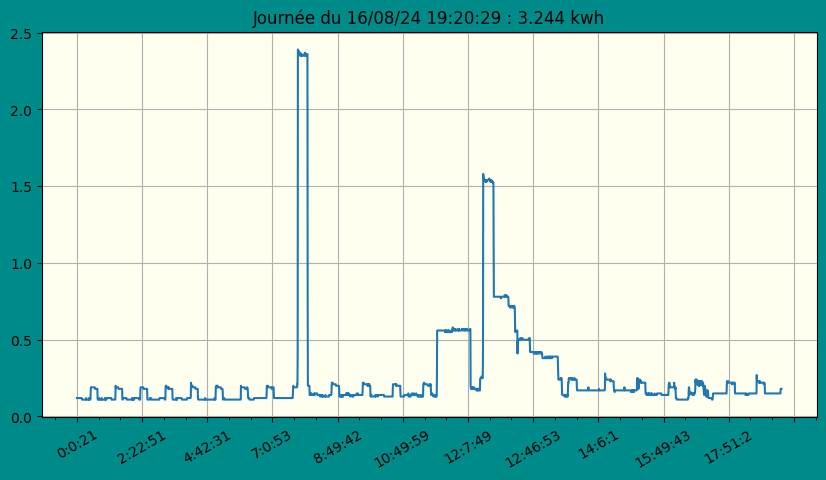

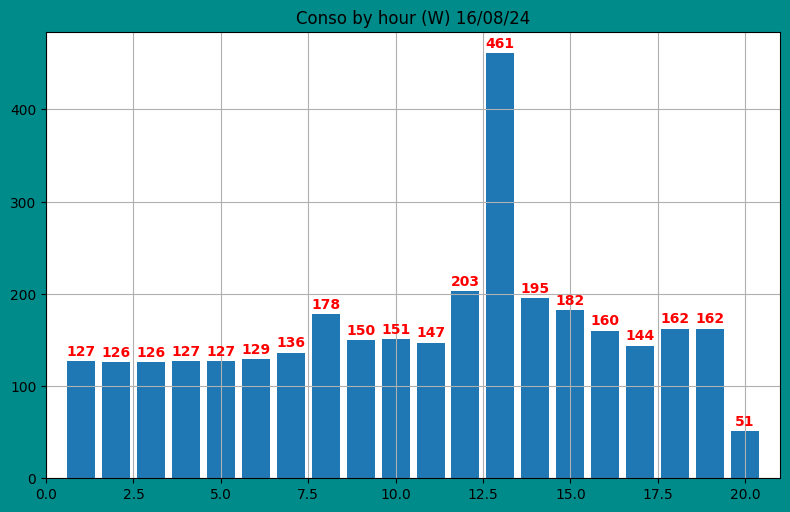

In [435]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [436]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_formatter_pandas.ipynb',
 'decimals

In [437]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [438]:
#conso_byhour(day)

In [439]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

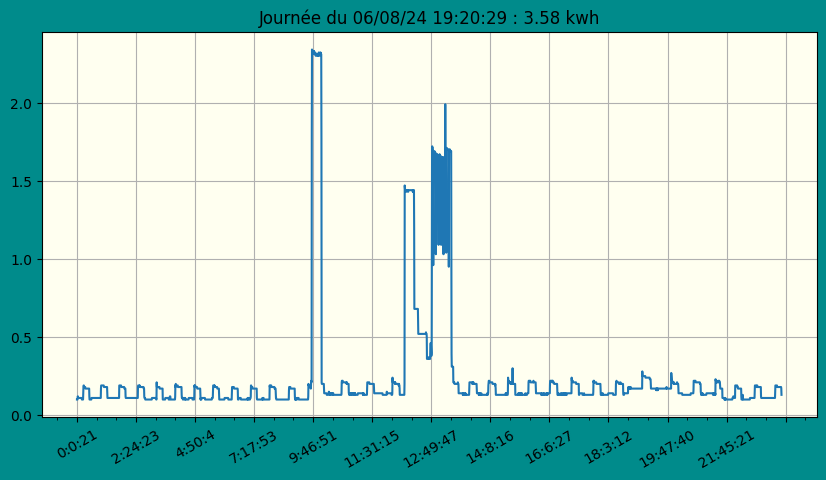

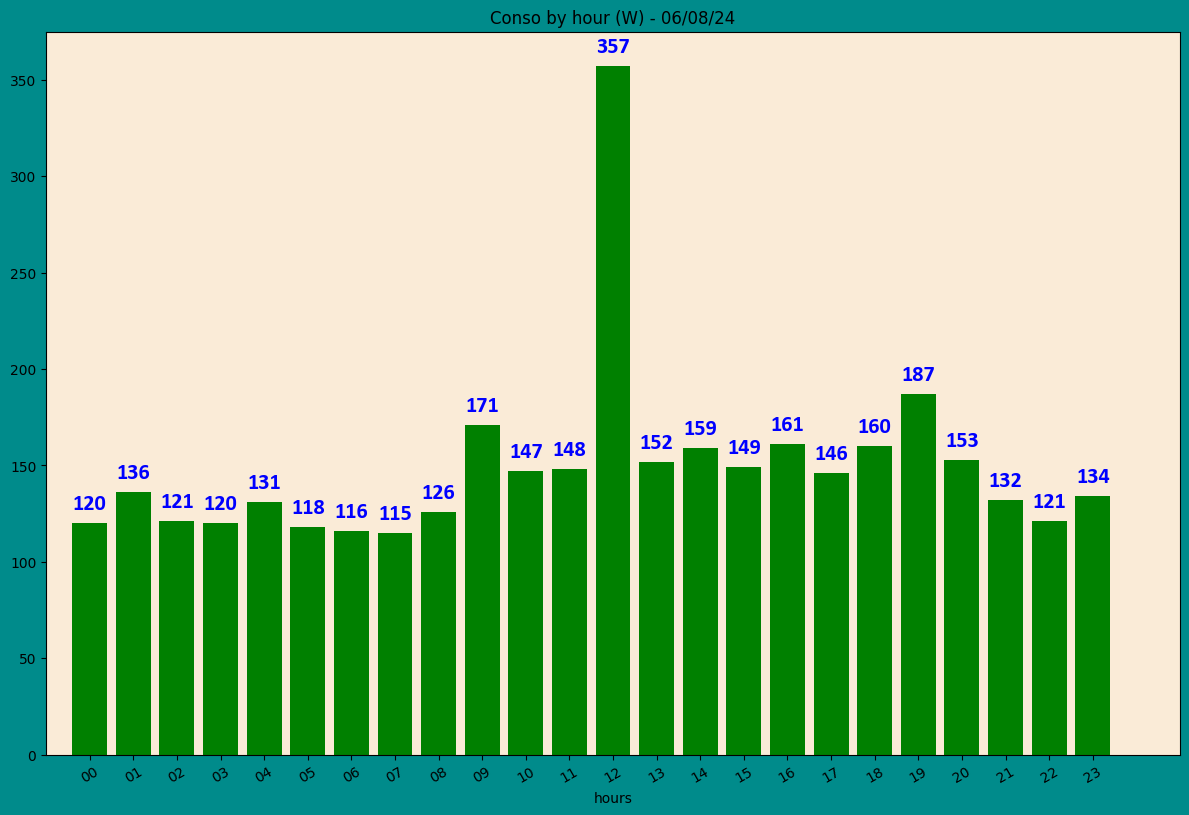

In [440]:
# plot any day
day = '06/08/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [441]:
month

days
17/07/24    3.390
18/07/24    3.281
19/07/24    3.448
20/07/24    3.386
21/07/24    3.688
22/07/24    3.675
23/07/24    3.567
24/07/24    3.596
25/07/24    3.443
26/07/24    3.218
27/07/24    3.157
28/07/24    2.882
29/07/24    3.074
30/07/24    3.675
31/07/24    3.691
01/08/24    3.865
02/08/24    3.035
03/08/24    3.316
04/08/24    3.356
05/08/24    3.541
06/08/24    3.580
07/08/24    3.782
08/08/24    3.616
09/08/24    3.615
10/08/24    4.042
11/08/24    3.700
12/08/24    4.370
13/08/24    4.362
14/08/24    3.592
15/08/24    4.014
Name: kWh, dtype: float64

In [442]:
month.idxmax()

'12/08/24'

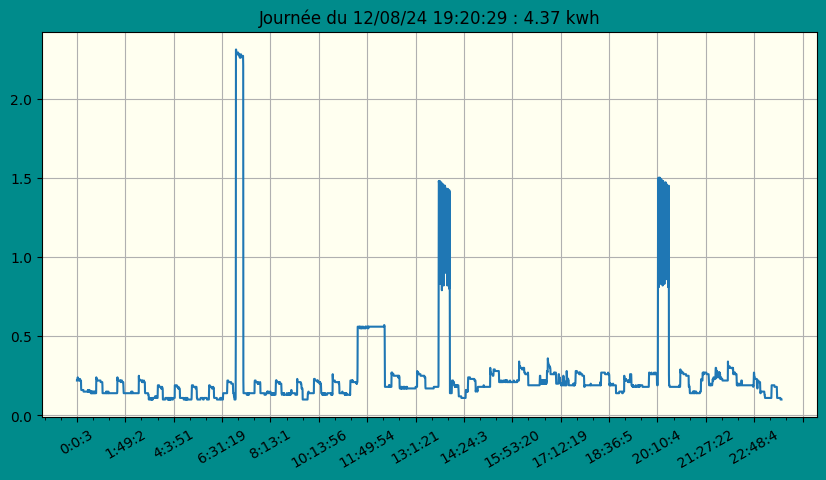

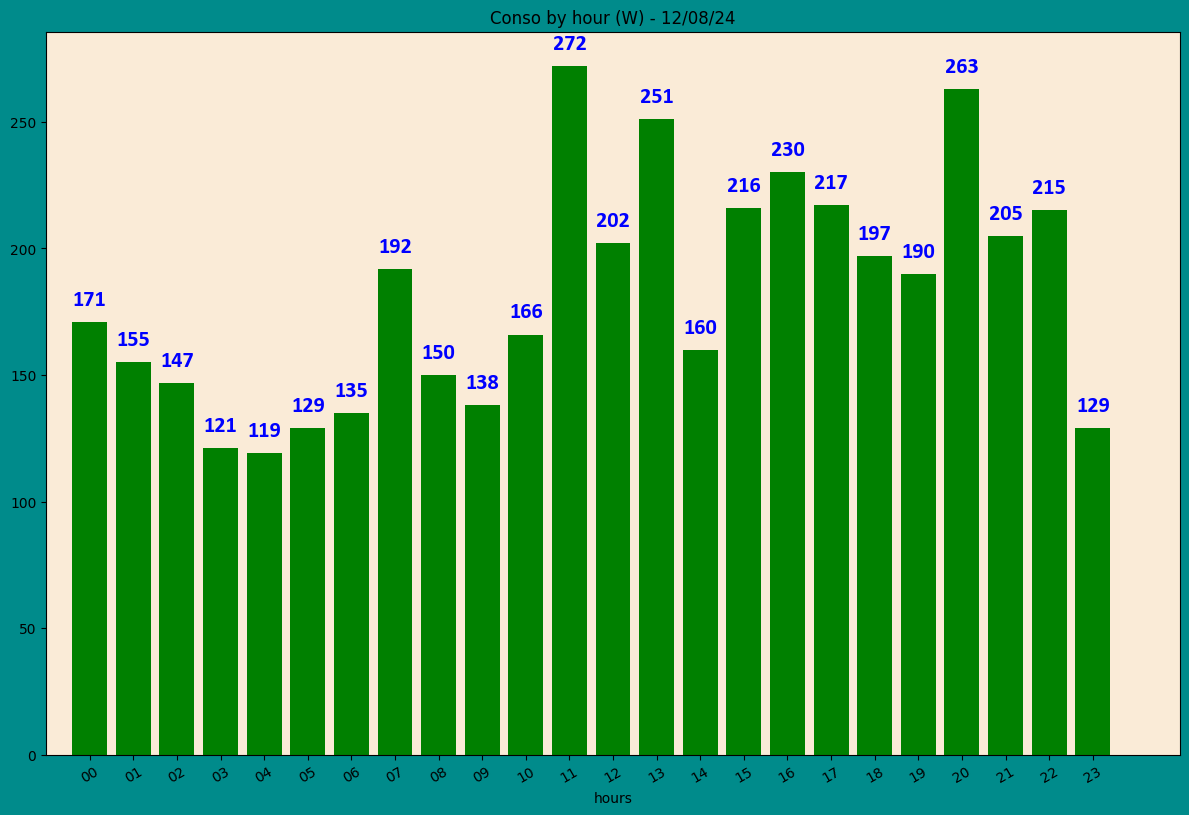

In [443]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [444]:
filename='conso_data.csv'
#conso_data.to_csv(filename)